# AEEC-DE tutorial

In this tutorial, we'll run the AEEC-DE on a testing function from *bbob2015* benchmark [1]. The definition of all testing functions from this benchmark is available [here.](http://numbbo.github.io/coco/testsuites/bbob)

## Step 1

Let's start by selecting a testing function from *bbob2015* benchmark, you'll get an object of `<class Benchmark>`:

In [1]:
import aeecde
import time
import pandas as pd
pd.set_option('display.max_columns', 5)
pd.set_option('display.width', 1000)


tik = time.time()
seed = 0 # The random seed is fixed ONLY for testing


benchmark = "bbob2015"
D = 10
funID = 7
problem = aeecde.problem.Benchmark(benchmark_set=benchmark, D=D, funID=funID, instanceID=1)
print(problem)

## Step 2

Next, we need to initialize the DE's hyperparameters:

In [2]:
NP = 24
config = aeecde.publics.parameterize.DE(
    seed = seed,
    N = NP,
    )
print(config)

`_rng`: RandomState(MT19937)
`seed`: 0
`_N`: Number of individuals
	Type: Integer
	Value: 24
	Range: [0, 9223372036854775808)
	Remark: The number of individuals in the population, e.g. particles in PSO, individuals in DE ...
`_initial_scheme`: Initialization scheme
	Type: String
	Value: latin_hypercube
	Allowable options: ('latin_hypercube', 'random')
	Default: latin_hypercube
	Remark: The method to be used in generating the initial sample. The allowable options are 'latin_hypercube' and 'random'.
`_update_scheme`: Update scheme
	Type: String
	Value: immediate
	Allowable options: ('immediate', 'deferred')
	Default: immediate
	Remark: The method to be used in updating the generation. The allowable options are 'immediate' and 'deferred'.
`_F`: Scaling factor
	Type: Float
	Value: 0.75
	Range: [0.0, 2.0)
	Default: 0.75
	Remark: The factor to be used in mutation operation. The allowable range is 0.0 <= `F` < 2.0.
`_CR`: Crossover rate
	Type: Float
	Value: 0.7
	Range: [0.0, 1.0)
	Default: 0.

As well as stop conditions:

In [3]:
stop = aeecde.publics.parameterize.StopCondition(
    max_FES=1000.*NP,
    max_iter=None,
    delta_ftarget=1e-8
    )
print(stop)

`_max_FES`: Maximum Function Evaluations
	Type: Float
	Value: 24000.0
	Range: [1.0, inf)
	Default: inf
	Remark: The maximum number of calling objective function.
`_max_iter`: Maximum Iterations
	Type: Float
	Value: None
	Range: [1.0, inf)
	Remark: The maximum number of the principal iteration in algorithm.
`_delta_ftarget`: Difference between the target and the theoretical optimum
	Type: Float
	Value: 1e-08
	Range: [0.0, inf)
	Default: 2.2250738585072014e-308
	Remark: The tolerance to accept a value as the optumum.
`_ftarget`: Target value of the objective function
	Type: Float
	Value: None
	Range: [-inf, inf)
	Remark: Stop if the value of objective function is less than this threshold.
`_condition_limit`: Target value of the objective function
	Type: Float
	Value: 10000000.0
	Range: [0.0, inf)
	Default: 10000000.0
	Remark: Stop if the condition number of the covariance matrix exceeds this limit (only valid in CMAES algorithm).


## Step 3

Now, you can personalize the AEEC-DE's parameters such as the mutation operators, the crossover operators, ...

In [4]:
optimizer = aeecde.AEECDE(opt_problem=problem,
                          algo_parameters=config,
                          stop_conditions=stop,
                          learning_gen=20,
                          state_threshold="median",
                          stagnation_gen=10,
                          model_update_frequency="each_gen",
                          model_utilization_strategy="strategy_5",
                          KDE_kernel="gaussian",
                          para_KDE_width_F=0.2,
                          para_KDE_width_CR=0.2,
                          para_KDE_max_size=50,
                          state_KDE_max_size=50*50,
                          bandit_algo="UCB",
                          bandit_value_method="sliding_window_average",
                          epsilon=0.2,
                          temperature=None,
                          sliding_window_size=50, # required for
                                                  # "sliding_window_average"
                         )

Then, you can solve the optimization problem by running `solve()` method. If you want to follow the result step by step, you can set `solve(disp=True)`:

In [5]:
results = optimizer.solve()

## Step 4 (Optional)

If you want to save the results permanently, you can use `save()` method. It will save the configurations, the stop conditions, the iteration history, and the final optimum to a JSON file. (In this example, a file named "BBOB2015-F7(I1), D=10_AEECDE" will be created in the current folder.)

In [6]:
optimizer.save()

## Step 5 (Optional)

Or you can just view the results on your screen like:

In [12]:
tok = time.time()
print("\tElapsed Time: {:.2f}s".format(tok-tik))
print("\tCalculated results:", results)
print("\tTheoretical optimal value:", problem.f_opt_theory)
print("\tRelative error:", results[1]-problem.f_opt_theory)
print("\tEvolved Generations:", optimizer.data.get("nth_hist")[-1])

	Elapsed Time: 360.17s
	Calculated results: (array([-0.23070348,  0.73544587,  0.27077375,  3.10549727,  2.40659918,
        3.92168008,  1.72971863, -2.46070269,  3.80581917,  2.14262356]), 92.94000000802644)
	Theoretical optimal value: 92.94
	Relative error: 8.026447062547959e-09
	Evolved Generations: 532


If you want to check the evolution of individuals and the exploring/exploiting state during the evolution, you can use:

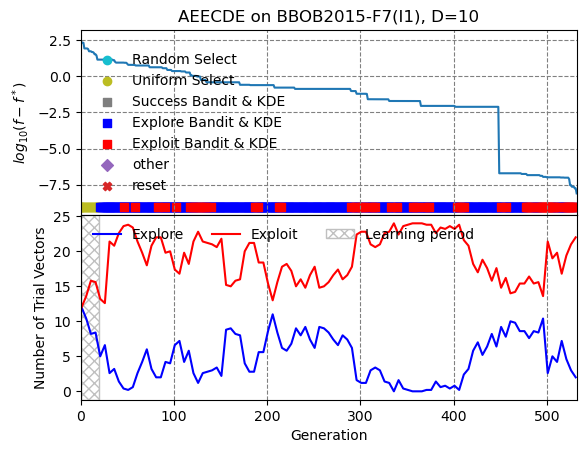

In [8]:
optimizer.show_evolution()

If you want to have a statistical summary of all the used operators, you can use:

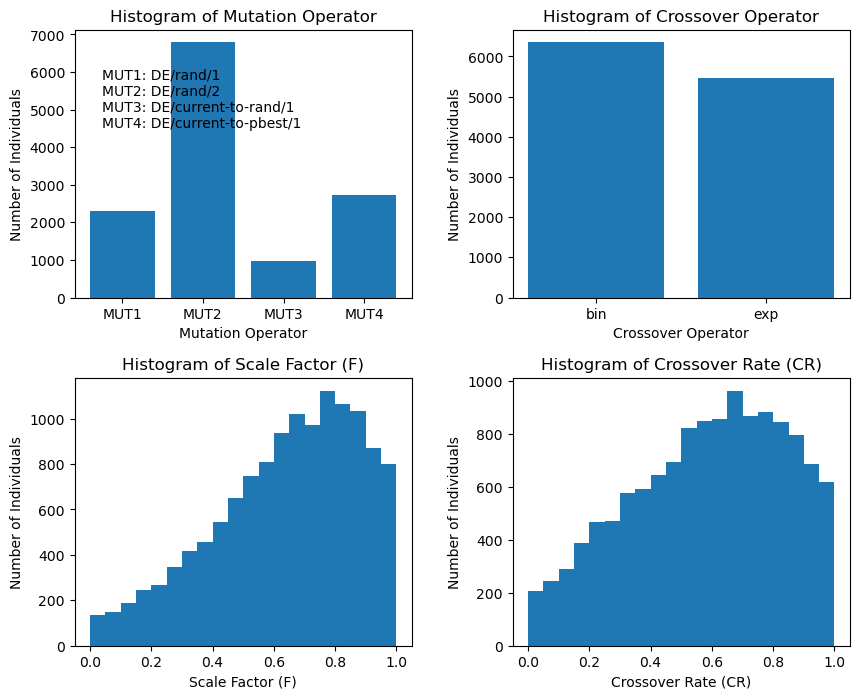

In [9]:
optimizer.plot_para_histogram()

## References

[1] Nikolaus Hansen, Anne Auger, Raymond Ros, Olaf Mersmann, Tea Tušar & Dimo Brockhoff (2021) COCO: a platform for comparing continuous optimizers in a black-box setting, Optimization Methods and Software, 36:1, 114-144, DOI: [10.1080/10556788.2020.1808977](https://doi.org/10.1080/10556788.2020.1808977)